<a href="https://colab.research.google.com/github/thelastgreykoala/time_series/blob/main/TS_DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импорт и очистка данных

In [3]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv", index_col = 'Month', parse_dates = True)
monthly_car = pd.read_csv("monthly-car-sales-in-quebec-1960.csv", index_col = 'Month', parse_dates = True)

airlines_passengers = pd.read_csv("international-airline-passengers.csv", index_col = 'Month', parse_dates = True)
airlines_passengers.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Count'}, inplace=True)
airlines_passengers.drop([airlines_passengers.index[len(airlines_passengers)-1]], inplace=True)
airlines_passengers.index = pd.to_datetime(airlines_passengers.index)

In [4]:
airlines_passengers

,Count
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [5]:
female_births = pd.read_csv("daily-total-female-births-in-cal.csv", index_col = 'Date', parse_dates = True)
air_temperature = pd.read_csv("mean-monthly-air-temperature-deg.csv", index_col = 'Month', parse_dates = True)
armed_robberies= pd.read_csv("monthly-boston-armed-robberies-j.csv", index_col = 'Month', parse_dates = True)

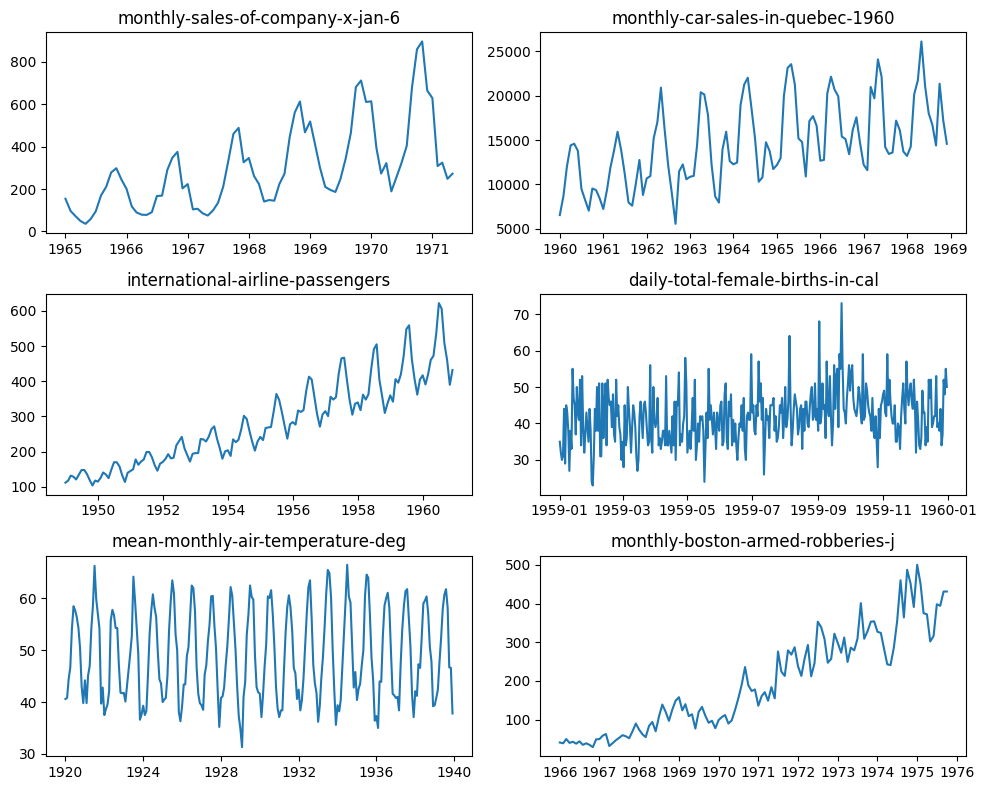

In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plt.plot(sales_of_company_x)
plt.title('monthly-sales-of-company-x-jan-6')

plt.subplot(322)
plt.plot(monthly_car)
plt.title('monthly-car-sales-in-quebec-1960')

plt.subplot(323)
plt.plot(airlines_passengers)
plt.title('international-airline-passengers')
plt.xlabel('')

plt.subplot(324)
plt.plot(female_births)
plt.title('daily-total-female-births-in-cal')

plt.subplot(325)
plt.plot(air_temperature)
plt.title('mean-monthly-air-temperature-deg')

plt.subplot(326)
plt.plot(armed_robberies)
plt.title('monthly-boston-armed-robberies-j')
plt.xlabel('')

plt.tight_layout()
plt.show()

Разложим временной ряд на компоненты.

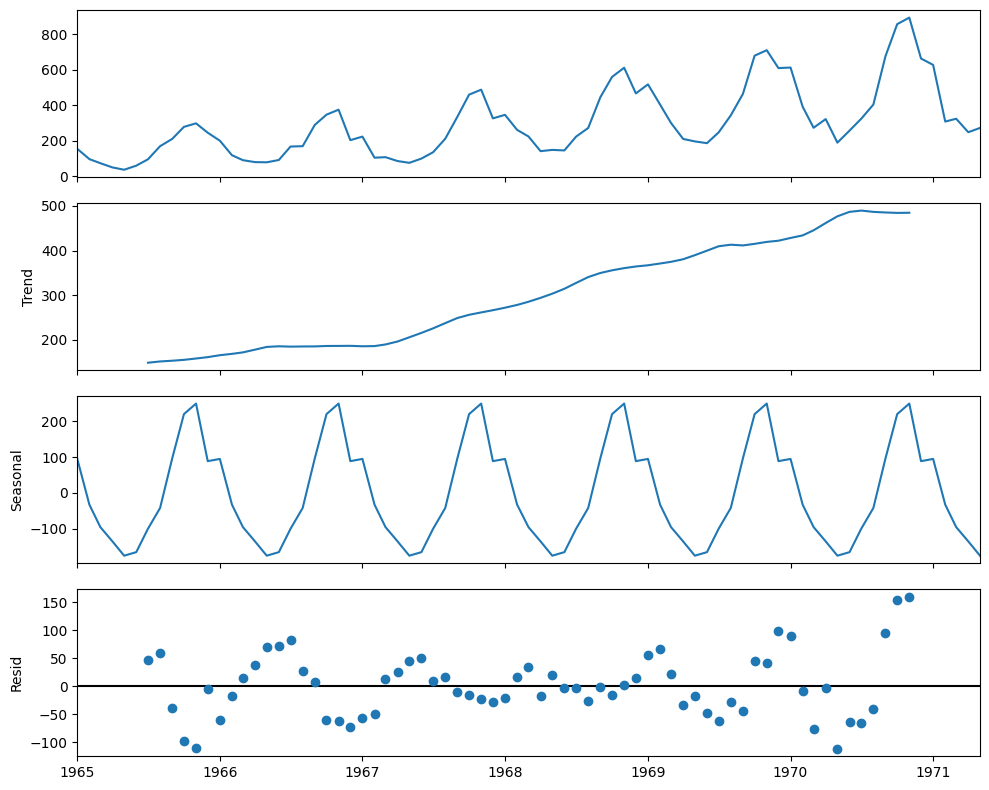

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(sales_of_company_x)
decompose.plot()

plt.show()

Посмотрим на Автокорреляцию

In [21]:
import statsmodels.tsa.api as smt

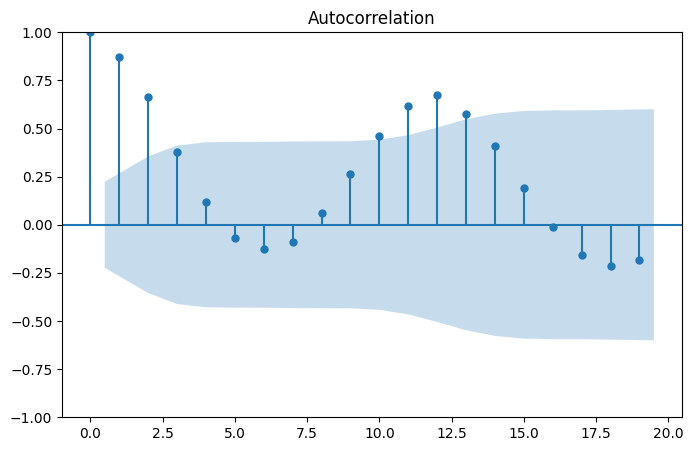

In [22]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(sales_of_company_x['Count'])
plt.show()

Судя по автокорреляции, ряд не стационарный. Посмотрим еще на статистический тест.

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [23]:
sales_of_company_x

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36
...,...
1971-01-01,628
1971-02-01,308
1971-03-01,324


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adf_test = adfuller(sales_of_company_x['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.9888894205170052


Вероятность (p-value) для данных существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

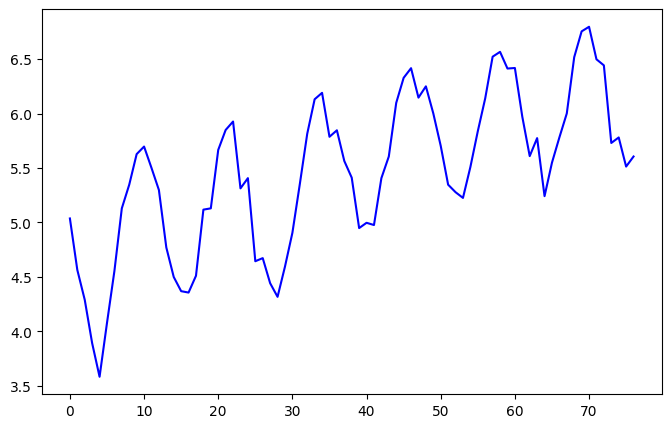

In [26]:
from scipy.stats import boxcox

series = boxcox(sales_of_company_x['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

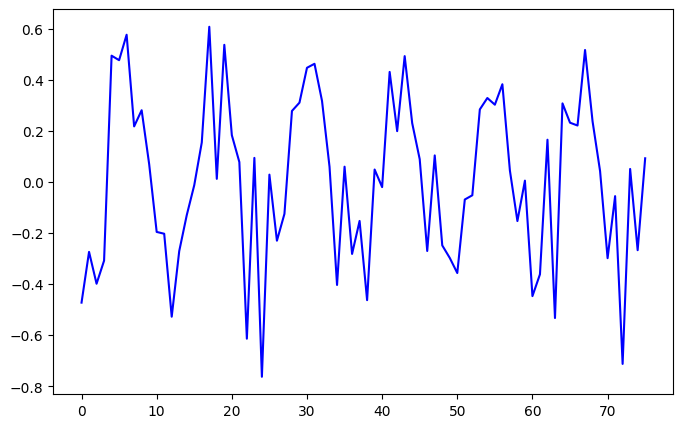

In [27]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [28]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.024025392839875176


Результат существенно меньше 5%. Временной ряд стационарен.

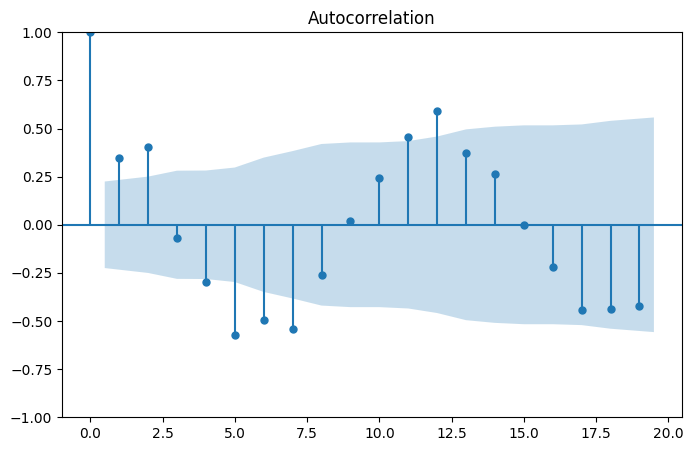

In [29]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()



---



То же самое делаем с двумя другими рядами

In [96]:
monthly_car

,Count
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


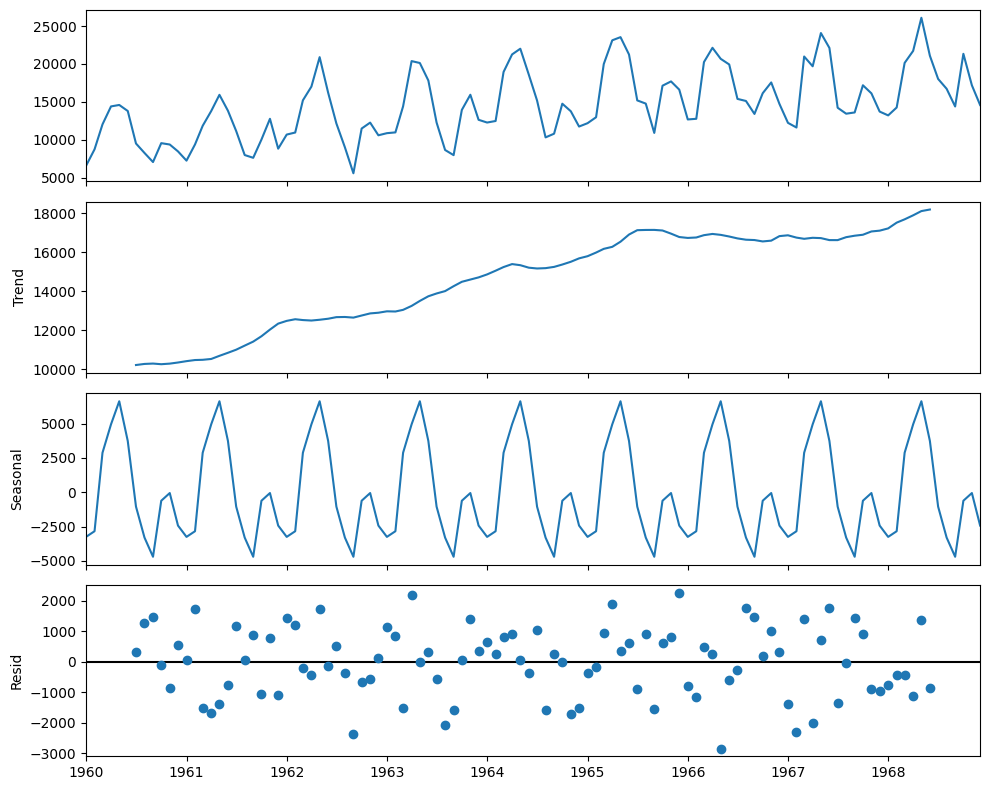

In [120]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(monthly_car)
decompose.plot()

plt.show()

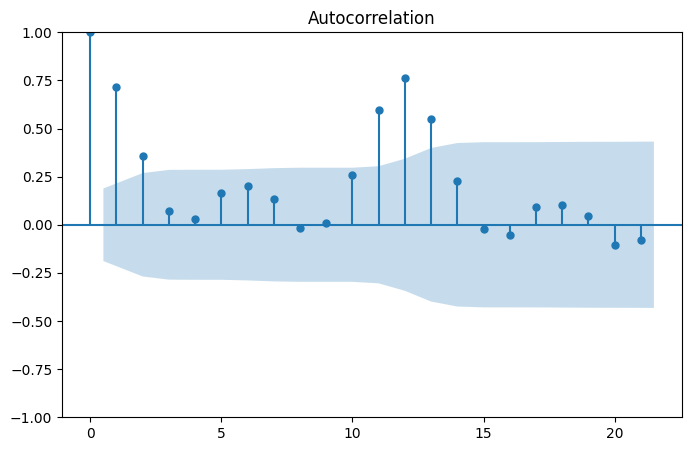

In [97]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(monthly_car['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [98]:
adf_test = adfuller(monthly_car['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.6632691049832861


Вероятность (p-value) для данных существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

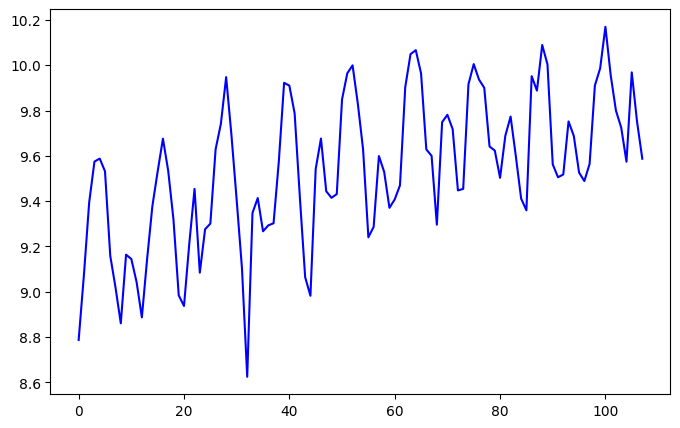

In [99]:
series = boxcox(monthly_car['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

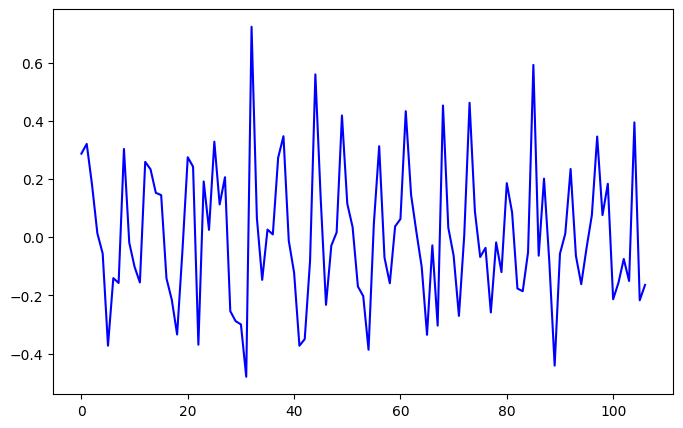

In [100]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [101]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.0006749140289813617


Результат существенно меньше 5%. Временной ряд стационарен.

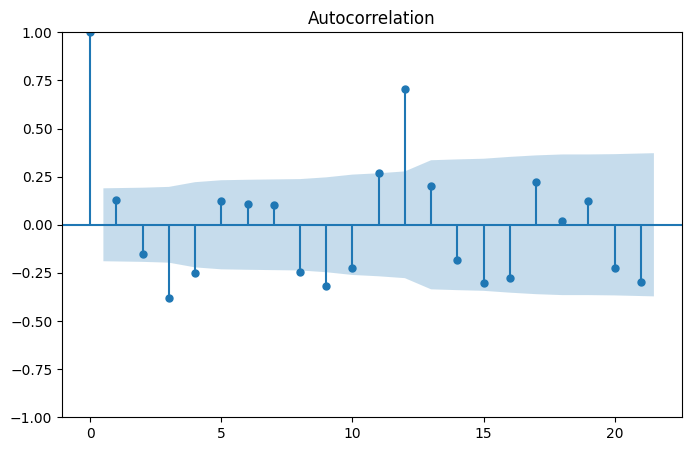

In [102]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()



---



In [138]:
airlines_passengers

,Count
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


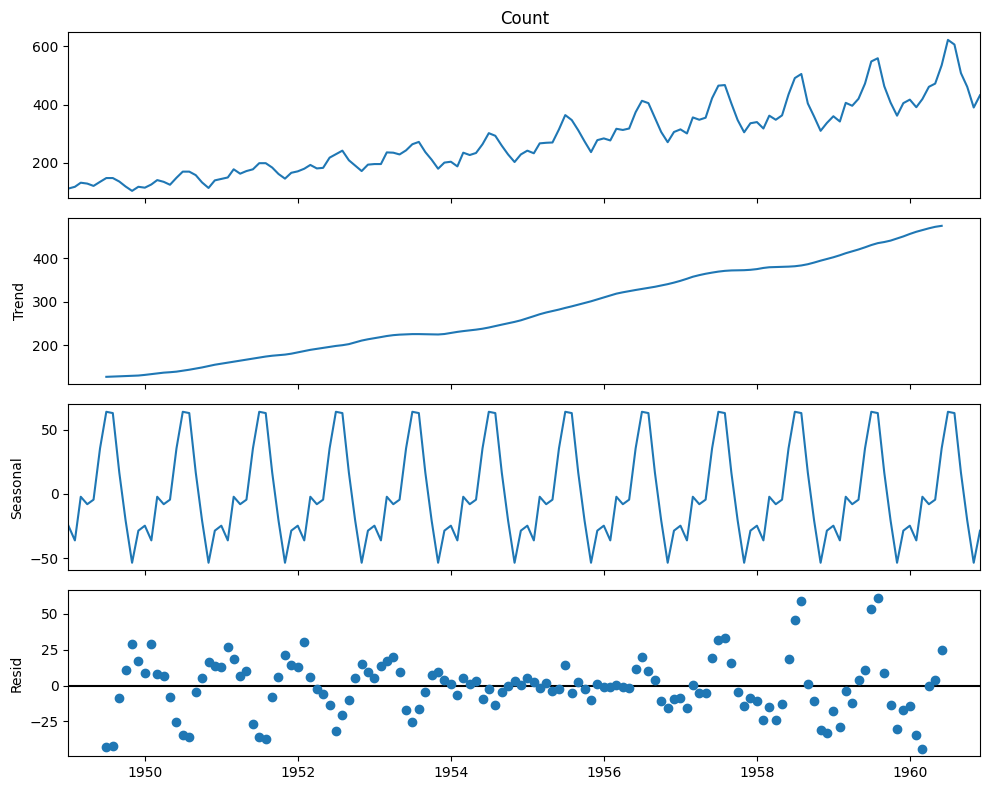

In [139]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(airlines_passengers['Count'])
decompose.plot()

plt.show()

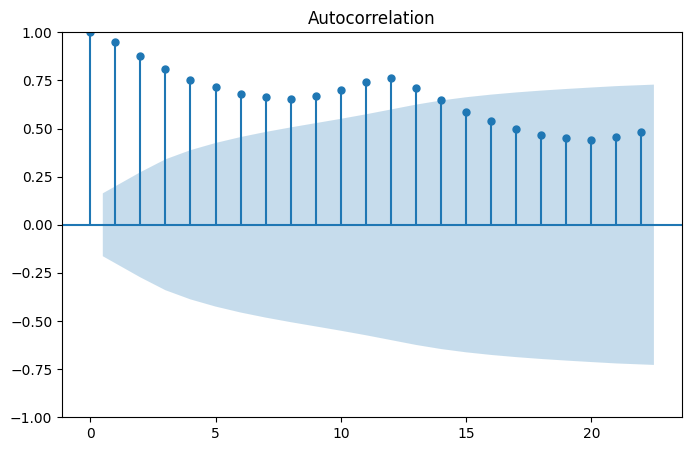

In [140]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(airlines_passengers['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [141]:
adf_test = adfuller(airlines_passengers['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


Вероятность (p-value) для данных существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

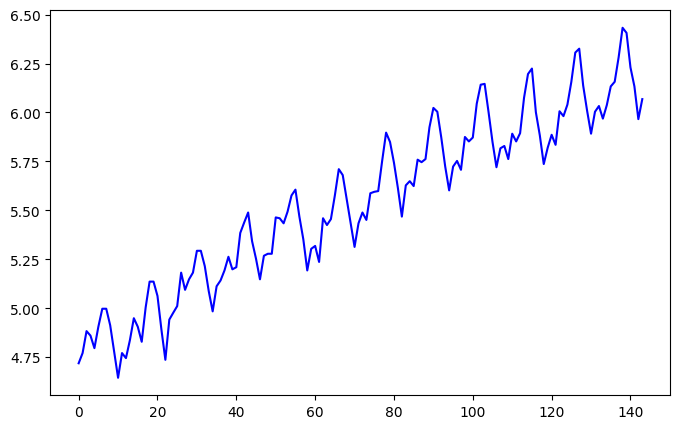

In [142]:
series = boxcox(airlines_passengers['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

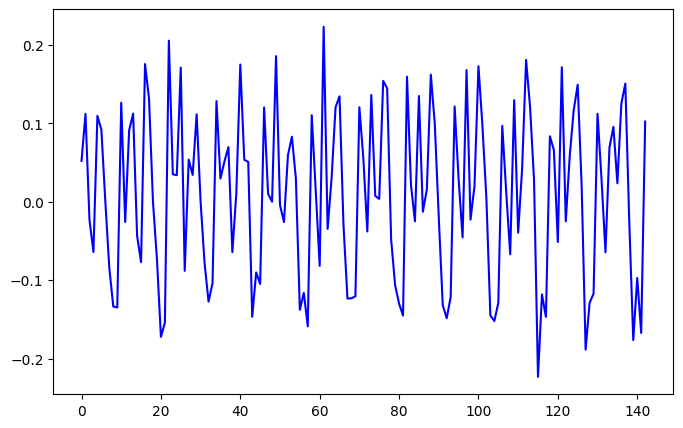

In [143]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [144]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.07112054815086184


Результат получился чуть больше 0.05. По формальному признаку мы не можем принять гипотезу о том, что ряд стационарен.

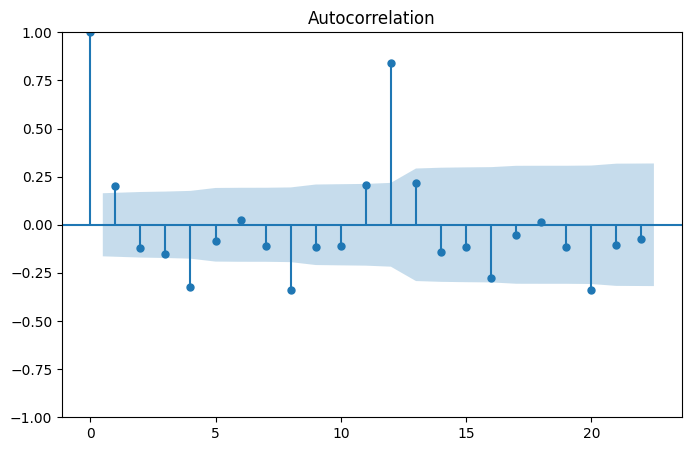

In [145]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()

Но судя по автокорреляции, ряд похож на стационарный.



---



In [30]:
female_births

,Count
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


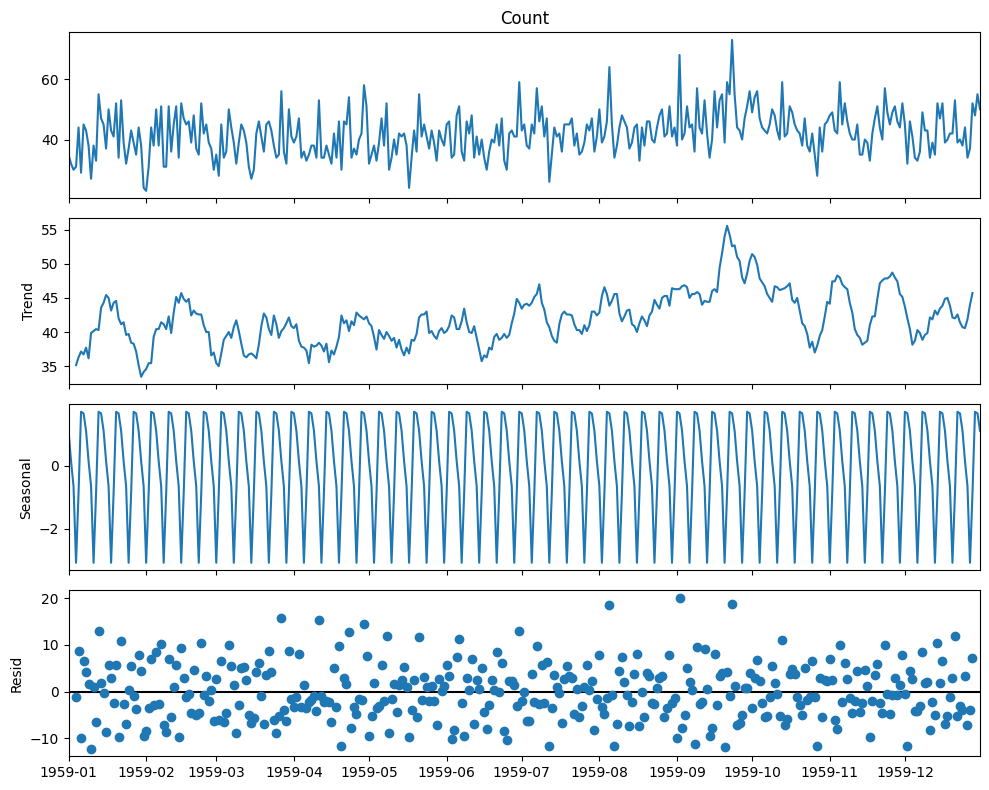

In [31]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(female_births['Count'])
decompose.plot()

plt.show()

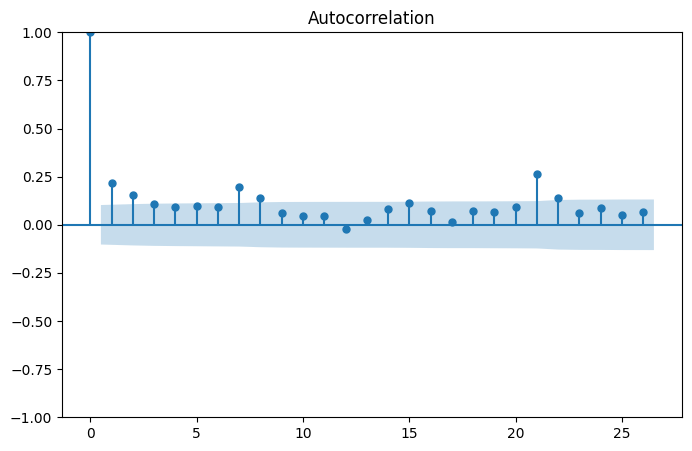

In [35]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(female_births['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [38]:
adf_test = adfuller(female_births['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 5.2434129901498554e-05


Вероятность (p-value) для данных ниже 0,05. Мы можем отвергнуть нулевую гипотезу. Процесс станионарный.




---



In [44]:
air_temperature

,Deg
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1
...,...
1939-08-01,61.8
1939-09-01,58.2
1939-10-01,46.7


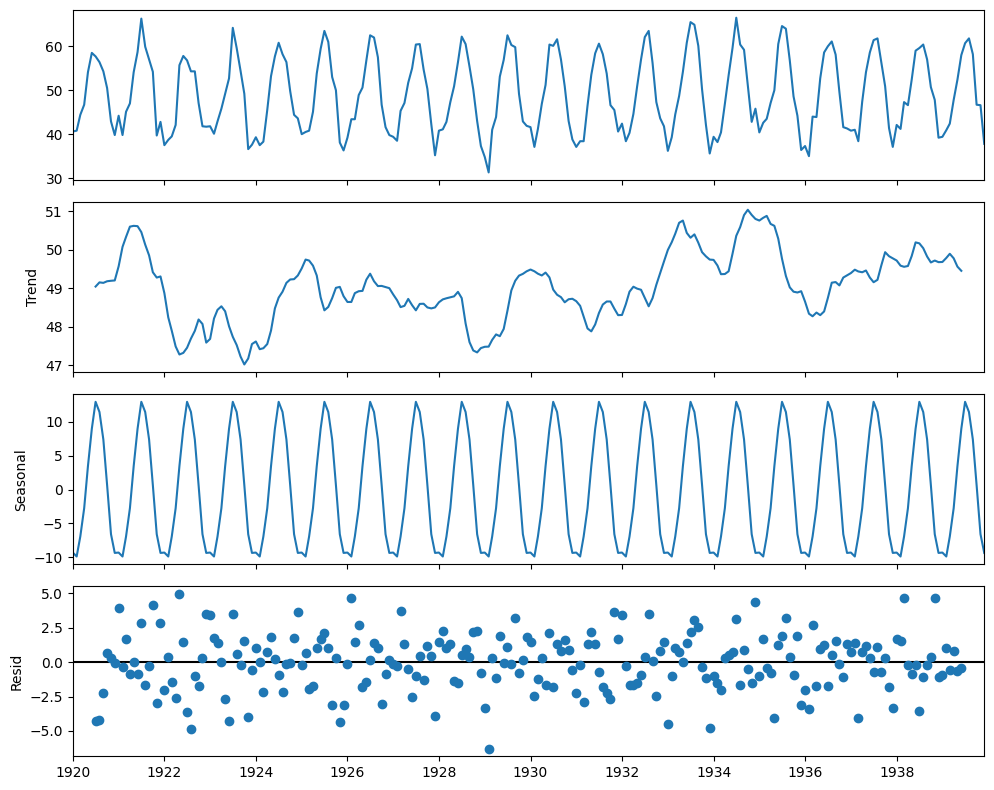

In [45]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(air_temperature)
decompose.plot()

plt.show()

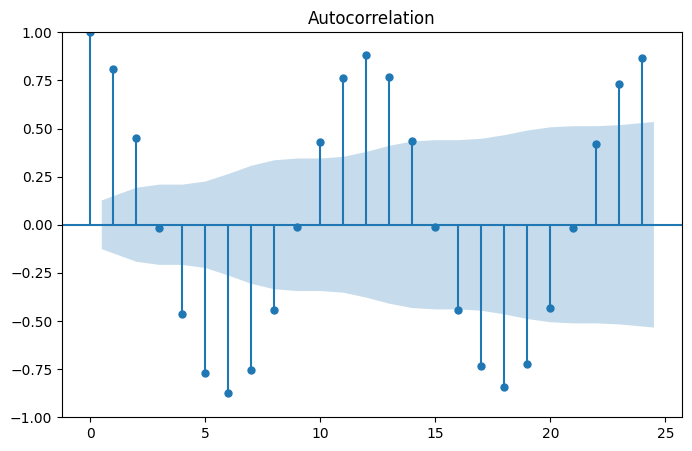

In [46]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(air_temperature['Deg'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [47]:
adf_test = adfuller(air_temperature['Deg'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.016989030222608604


Вероятность (p-value) для данных немного ниже 0,05. Мы можем отвергнуть нулевую гипотезу. Процесс станионарный по тесту.

Однако по графику видна четкая сезонность и тренд, что может говорить о том, что процесс все-таки нестационарный.

Нормализуем дисперсию

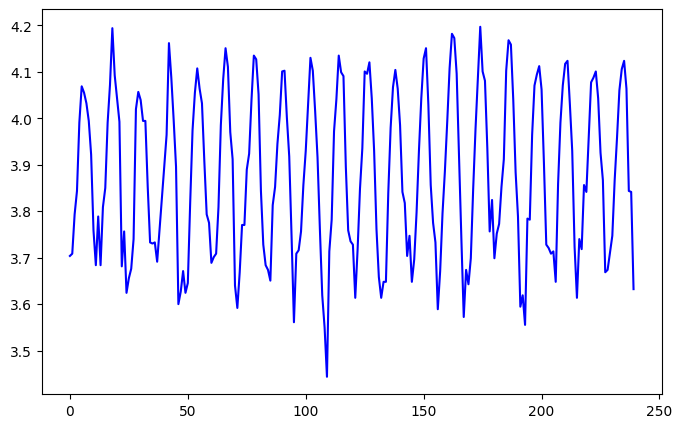

In [48]:
series = boxcox(air_temperature['Deg'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

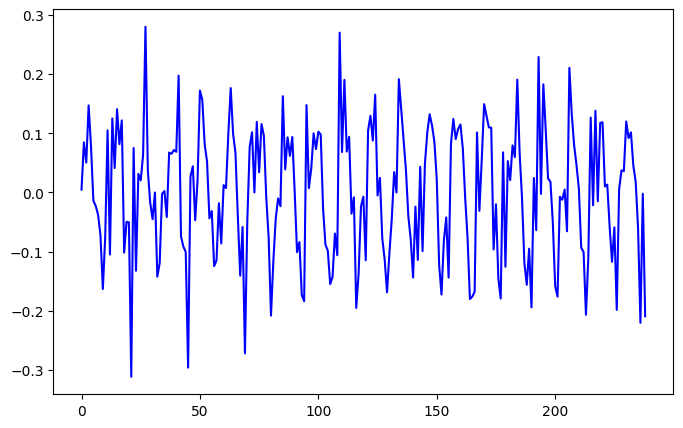

In [49]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [50]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 1.6407281304676633e-22


Сейчас результат существенно меньше 5%. Временной ряд стационарен.

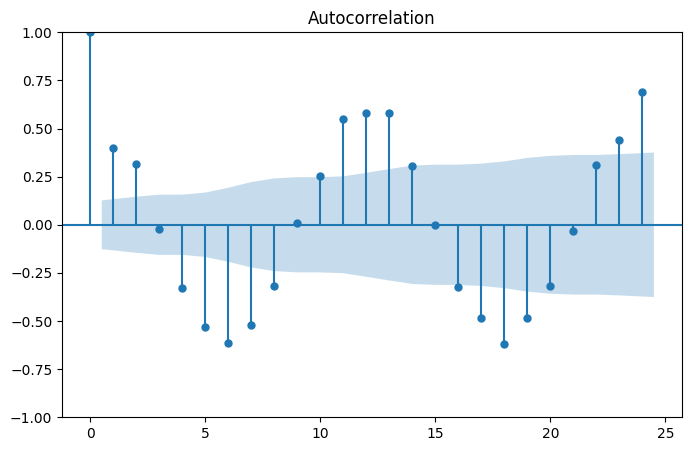

In [51]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()



---



In [53]:
armed_robberies

,Count
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43
...,...
1975-06-01,316
1975-07-01,398
1975-08-01,394


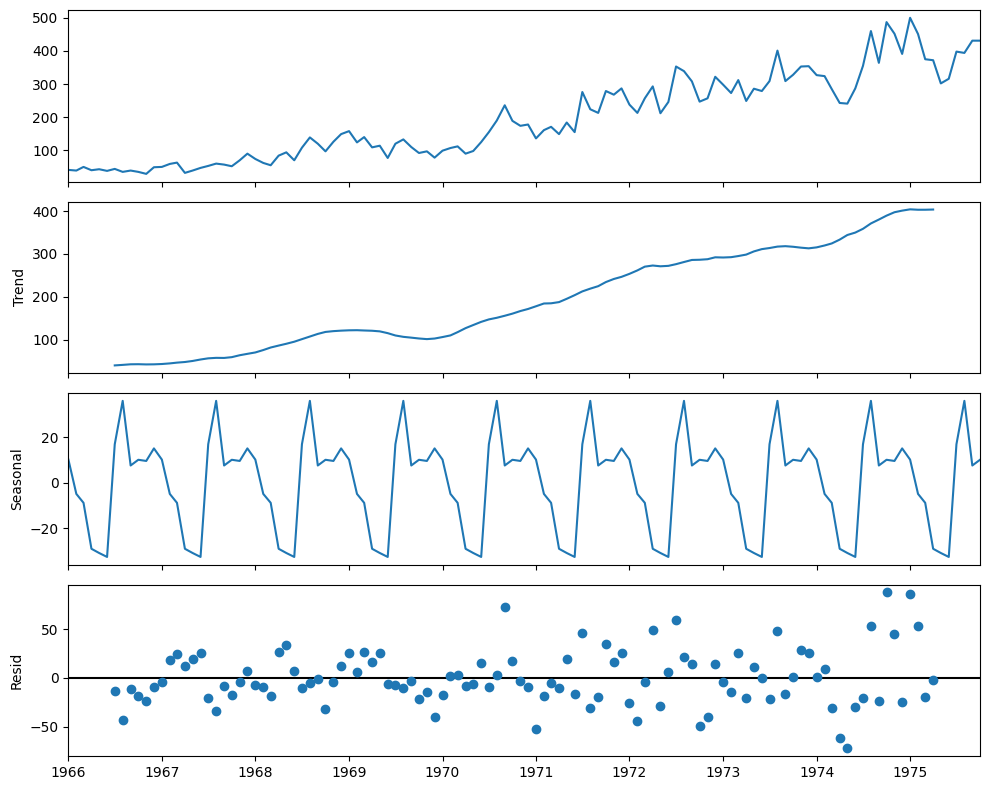

In [54]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(armed_robberies)
decompose.plot()

plt.show()

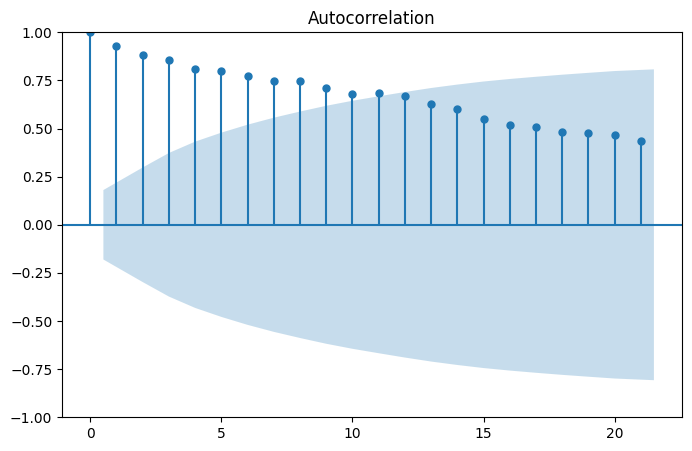

In [55]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(armed_robberies['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [56]:
adf_test = adfuller(armed_robberies['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.994277563805723


Вероятность (p-value) для данных существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

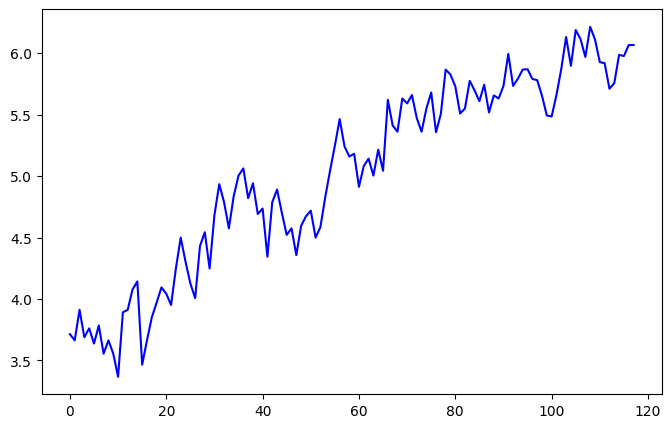

In [57]:
series = boxcox(armed_robberies['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

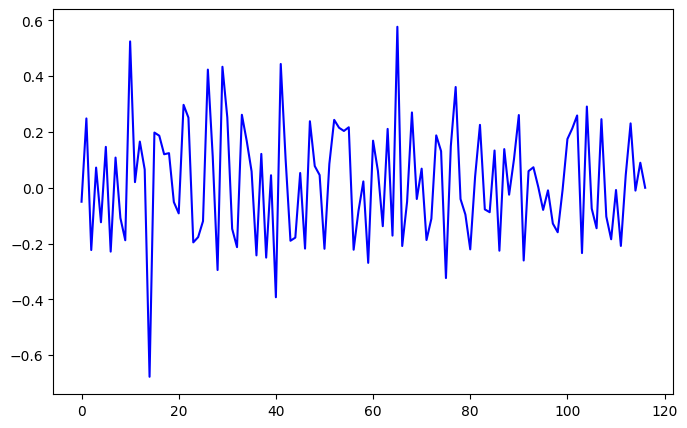

In [58]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [59]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 2.3786024417437596e-11


Результат существенно меньше 5%. Временной ряд стационарен.

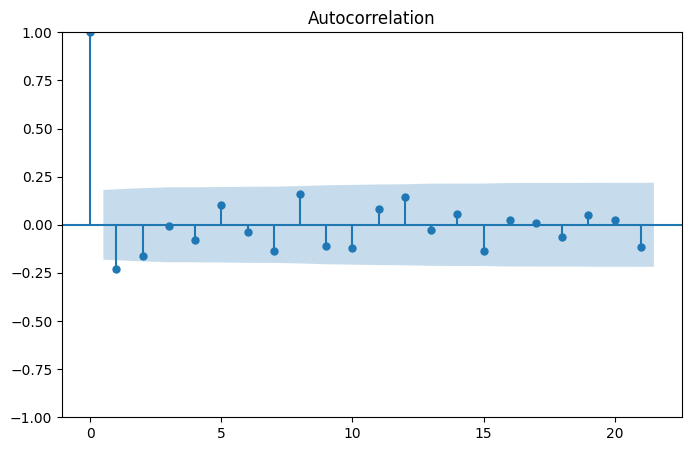

In [60]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()